In [151]:
import numpy as np
from qiskit import *
from qiskit.circuit.random import random_circuit
IBMQ.save_account('63660300336241cbc37115ad2a0a31cba961b97ef980b61b34c2da64e2a8d8c27570ad4a3595c9dce0ead7ed3ec149821fd0c4e82da989df70daa33d0e674995')
provider = IBMQ.load_account()
%matplotlib inline

configrc.store_credentials:WARNING:2020-10-01 18:03:02,183: Credentials already present. Set overwrite=True to overwrite.
c:\users\gk\anaconda3\envs\quantum\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-10-01 18:03:02,409: Credentials are already in use. The existing account in the session will be replaced.


In [152]:
qc_raw = QuantumCircuit.from_qasm_file("randomCircuitIdentity.qasm")

In [153]:
def actual_noise(test_circuit, architecture):
    #Build transpiled circuit
    qc = transpile(test_circuit, backend=architecture)
    #Run
    job = execute(qc, backend)
    test_result = job.result()
    #Start vector, pure result
    null_vector_string = '0' * (test_circuit.num_qubits - test_circuit.num_ancillas)
    null_vector_counts = qiskit.result.Counts({null_vector_string: 1024})
    #Actual result
    result_vector_counts = test_result.get_counts(qc)
    print(null_vector_counts)
    print(result_vector_counts)
    return post_fidelity(null_vector_counts, result_vector_counts)

In [154]:
def pure_sim_noise(test_circuit, architecture):
    #Build transpiled circuit
    qc = transpile(test_circuit, backend=architecture)
    #Run
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1024)
    test_result = job.result()
    #Start vector, pure result
    null_vector_string = '0' * (test_circuit.num_qubits - test_circuit.num_ancillas)
    null_vector_counts = qiskit.result.Counts({null_vector_string: 1024})
    #Actual result
    result_vector_counts = test_result.get_counts(qc)
    print(null_vector_counts)
    print(result_vector_counts)
    return post_fidelity(null_vector_counts, result_vector_counts)

In [155]:
def post_fidelity(c1, c2):
    hf = quantum_info.hellinger_fidelity(c1, c2)
    bc = 1 - (hf * hf)
    return bc * bc

In [156]:
backend = provider.backends.ibmqx2
print ("Pure Sim:", pure_sim_noise(qc_raw, backend))
print ("IBM:", actual_noise(qc_raw, backend))

{'000': 1024}
{'000': 1024}
Pure Sim: 0.0
{'000': 1024}
{'000': 241, '001': 81, '010': 53, '011': 54, '100': 52, '101': 278, '110': 27, '111': 238}
IBM: 0.8468023944333251


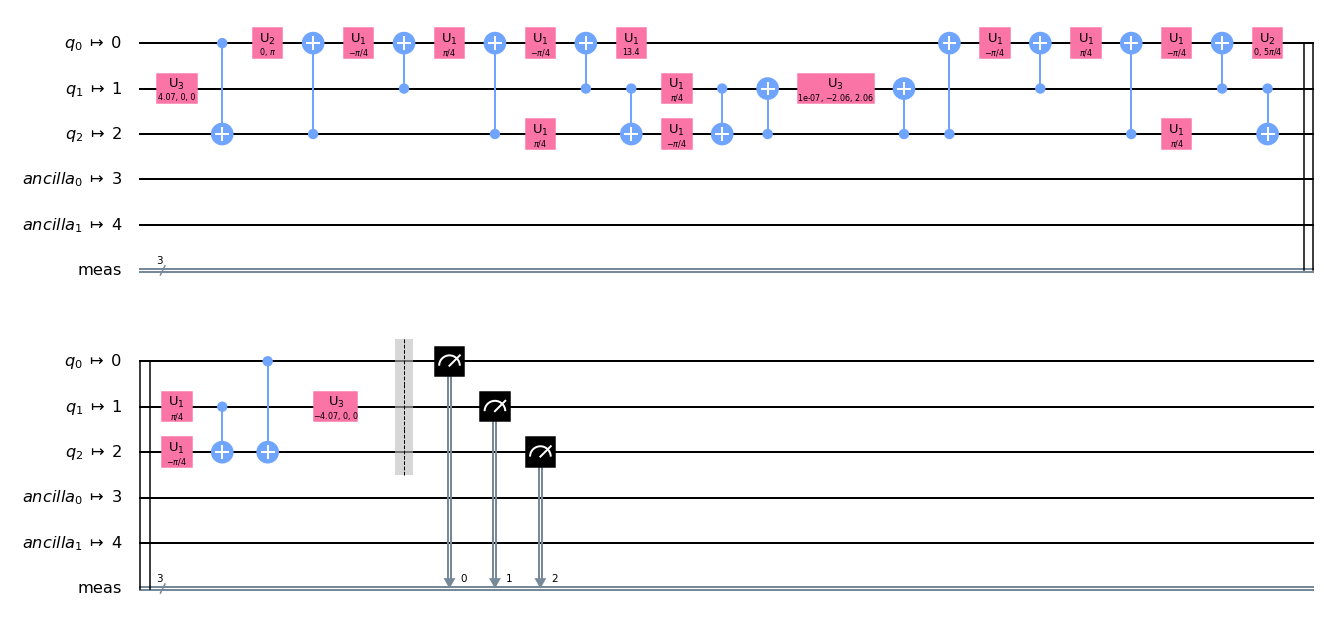

In [132]:
qc_transpiled = transpile(qc_raw, backend=backend)
qc_transpiled.draw('mpl')